In [7]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
#import pymc3 as pm
import seaborn as sns
import pandas as pd
#from theano import shared
from sklearn import preprocessing

In [9]:
pune = pd.read_csv('Precipitation data(csv)/preci_pune.csv')
beed = pd.read_csv('Precipitation data(csv)/preci_beed.csv')
sangli = pd.read_csv('Precipitation data(csv)/preci_sangli.csv')

In [10]:
import datetime

In [11]:
pune['system:index'] = pd.to_datetime(pune['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')
beed['system:index'] = pd.to_datetime(beed['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')
sangli['system:index'] = pd.to_datetime(sangli['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')

In [12]:
del pune['date'],pune['.geo'],beed['date'],beed['.geo'],sangli['date'],sangli['.geo']

In [13]:
pune.columns = pd.Index(['date','value'])
beed.columns = pd.Index(['date','value'])
sangli.columns = pd.Index(['date','value'])

In [14]:
pune['date'] = pd.to_datetime(pune['date'])
beed['date'] = pd.to_datetime(beed['date'])
sangli['date'] = pd.to_datetime(sangli['date'])

In [15]:
pune.set_index("date", inplace = True)
beed.set_index("date", inplace = True)
sangli.set_index("date", inplace = True)

In [16]:
pune1 = pune.resample('D').sum()
beed1 = beed.resample('D').sum()
sangli1 = sangli.resample('D').sum()

In [17]:
pune2 = pune.resample('M').sum()
beed2 = beed.resample('M').sum()
sangli2 = sangli.resample('M').sum()

In [18]:
pune2 = pune2.reset_index()
beed2 = beed2.reset_index()
sangli2 = sangli2.reset_index()

In [19]:
pune2['date'] = pd.to_datetime(pune2['date'],format='%Y%m%d').dt.strftime('%Y-%m')
sangli2['date'] = pd.to_datetime(sangli2['date'],format='%Y%m%d').dt.strftime('%Y-%m')
beed2['date'] = pd.to_datetime(beed2['date'],format='%Y%m%d').dt.strftime('%Y-%m')

In [20]:
pune2['date'] = pd.to_datetime(pune2['date'],format = '%Y-%m')
beed2['date'] = pd.to_datetime(beed2['date'],format = '%Y-%m')
sangli2['date'] = pd.to_datetime(sangli2['date'],format = '%Y-%m')

In [21]:
pune2['Month'] = pune2['date'].dt.month
pune2['Year'] = pune2['date'].dt.year
beed2['Month'] = beed2['date'].dt.month
beed2['Year'] = beed2['date'].dt.year
sangli2['Month'] = sangli2['date'].dt.month
sangli2['Year'] = sangli2['date'].dt.year

In [22]:
import calendar
pune2['Month'] = pune2['Month'].apply(lambda x: calendar.month_name[x])
beed2['Month'] = beed2['Month'].apply(lambda x: calendar.month_name[x])
sangli2['Month'] = sangli2['Month'].apply(lambda x: calendar.month_name[x])

In [23]:
pune = pune2.pivot_table(index = ['Year'],columns=['Month'],values=['value'])
beed = beed2.pivot_table(index = ['Year'],columns=['Month'],values=['value'])
sangli = sangli2.pivot_table(index = ['Year'],columns=['Month'],values=['value'])

In [24]:
#pune.to_csv('Pune_Monthly.csv')
#sangli.to_csv('Sangli_Monthly.csv')
#beed.to_csv('Beed_Monthly.csv')

In [26]:
pune = pd.read_csv('Precipitation data(csv)/Pune_Monthly.csv')
beed = pd.read_csv('Precipitation data(csv)/Beed_Monthly.csv')
sangli = pd.read_csv('Precipitation data(csv)/Sangli_Monthly.csv')

In [27]:
pune = pune.loc[0:19,['Year','June','July','August','September','October']]
sangli = sangli.loc[0:19,['Year','June','July','August','September','October']]
beed = beed.loc[0:19,['Year','June','July','August','September','October']]

In [28]:
x = ['June','July','August','September','October']
def Prob(thresh,df):
    count = []
    probab = []
    for i in x:
        prob = df[i].apply(lambda x: x>thresh)
        prob = sum(prob == True)
        count.append(prob)
    s = sum(count)
    for i in count:
        probab.append(i/s)
    return probab

In [29]:
Prob(500,pune)

[0.21428571428571427,
 0.32142857142857145,
 0.30357142857142855,
 0.16071428571428573,
 0.0]

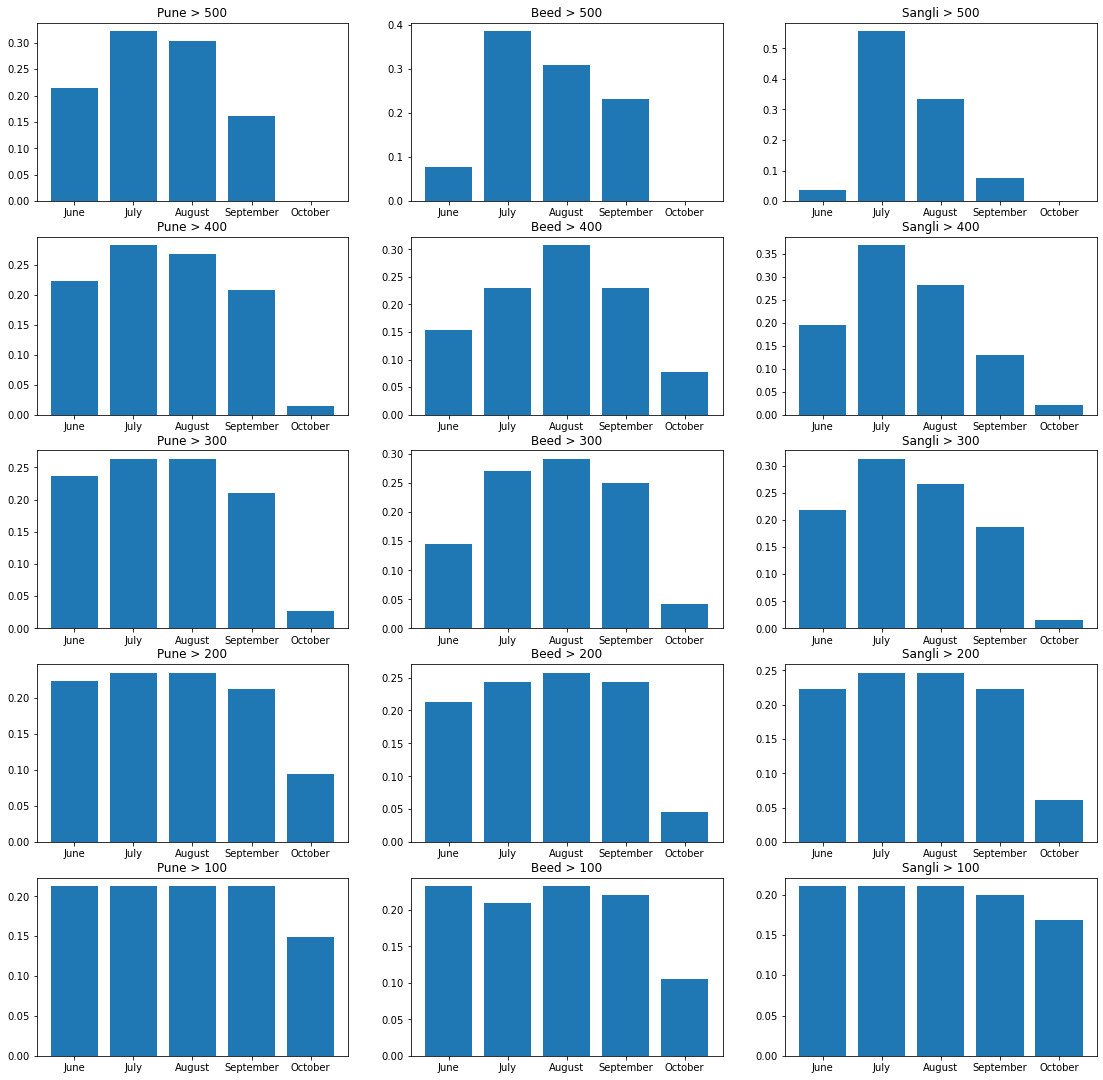

In [30]:
thresh = [500,400,300,200,100]
x = ['June','July','August','September','October']
fig, axs = plt.subplots(5, 3,figsize=(19,19))
for i in range(5):
    axs[i,0].bar(x,Prob(thresh[i],pune))
    axs[i,0].set_title('Pune > {x}'.format(x=thresh[i]))
    axs[i,1].bar(x,Prob(thresh[i],beed))
    axs[i,1].set_title('Beed > {x}'.format(x=thresh[i]))
    axs[i,2].bar(x,Prob(thresh[i],sangli))
    axs[i,2].set_title('Sangli > {x}'.format(x=thresh[i]))
plt.show()

In [31]:
pune

,Year,June,July,August,September,October
0,2000,475.586883,612.940301,625.234061,295.371545,145.212529
1,2001,350.407319,672.039534,528.866557,410.736782,283.155956
2,2002,546.104037,301.488473,659.035997,186.181449,96.786051
3,2003,491.868450,714.931202,524.499788,213.037350,84.642203
4,2004,537.250220,813.673557,896.345390,464.974617,40.929444
5,2005,578.330840,1257.217138,761.125433,767.422139,162.924614
6,2006,517.774160,1185.028117,1132.003897,495.343583,155.175031
7,2007,730.280321,769.995820,802.632464,512.247635,30.454075
8,2008,501.630518,557.983748,786.348995,755.498241,72.841195
9,2009,318.553858,1147.300098,578.012127,485.516557,209.080935


In [32]:
mean_pune = pune.mean(axis = 0)
mean_pune

Year         2009.500000
June          495.117802
July          872.435649
August        686.217255
September     480.015840
October       173.655625
dtype: float64

In [33]:
m_pune = []
for i in range(1,6):
    m_pune.append(mean_pune[i])

In [34]:
mean_sangli = sangli.mean(axis = 0)
mean_beed = beed.mean(axis = 0)
m_sangli = []
m_beed = []
for i in range(1,6):
    m_sangli.append(mean_sangli[i])
    m_beed.append(mean_beed[i])

In [35]:
mean_pune = dict(zip(x,m_pune))
mean_sangli = dict(zip(x,m_sangli))
mean_beed = dict(zip(x,m_beed))

In [36]:
def probMean(df,mean):
    count = []
    for i in x:
        prob = df[i].apply(lambda x: mean[i]-100<=x<=mean[i]+100)
        prob = sum(prob == True)
        count.append(prob)
    probab = [i/20 for i in count]
    return probab

In [37]:
prob_pune = probMean(pune,mean_pune)
prob_beed = probMean(beed,mean_beed)
prob_sangli = probMean(sangli,mean_sangli)

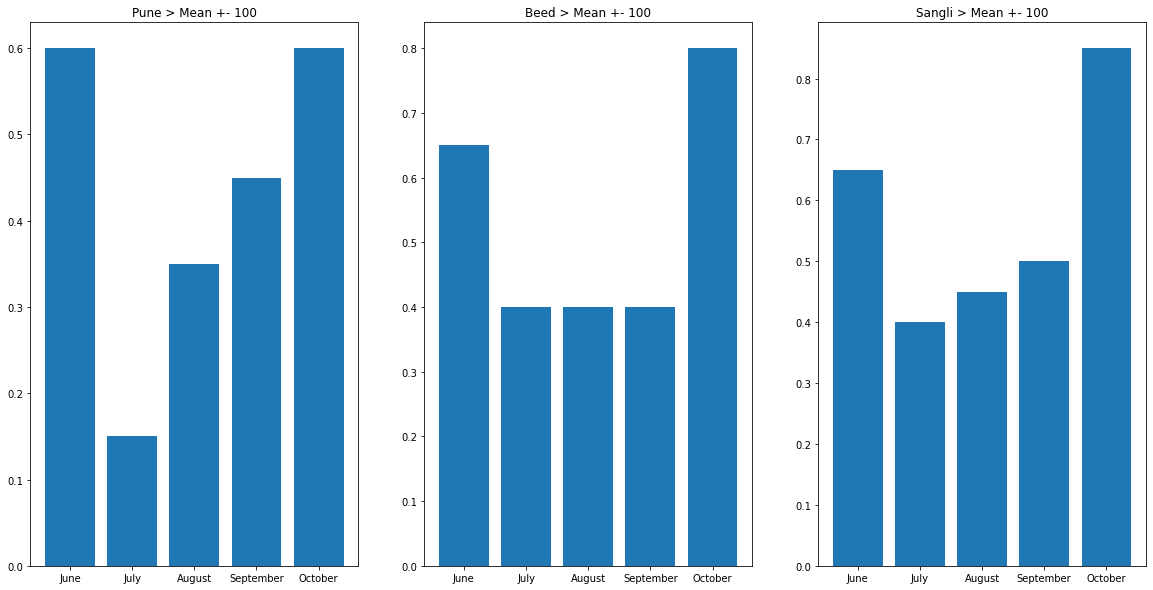

In [38]:
fig, axs = plt.subplots(1, 3,figsize=(20,10))
axs[0].bar(x,prob_pune)
axs[0].set_title('Pune > Mean +- 100')
axs[1].bar(x,prob_beed)
axs[1].set_title('Beed > Mean +- 100')
axs[2].bar(x,prob_sangli)
axs[2].set_title('Sangli > Mean +- 100')
plt.show()

In [39]:
def Prob_M(mean,df):
    count = []
    probab = []
    for i in x:
        prob = df[i].apply(lambda x: mean[i]-100<=x<=mean[i]+100)        
        prob = sum(prob == True)
        count.append(prob)
    s = sum(count)
    for i in count:
        probab.append(i/s)
    return probab

In [40]:
M_pune = Prob_M(mean_pune,pune)
M_sangli = Prob_M(mean_sangli,sangli)
M_beed = Prob_M(mean_beed,beed)

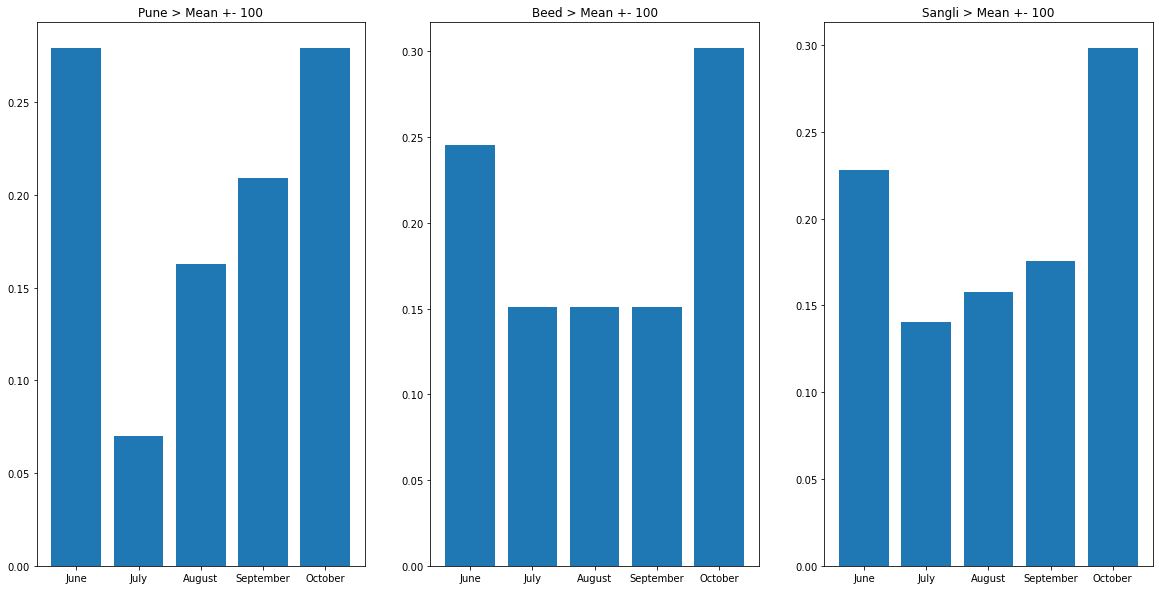

In [41]:
fig, axs = plt.subplots(1, 3,figsize = (20,10))
axs[0].bar(x,M_pune)
axs[0].set_title('Pune > Mean +- 100')
axs[1].bar(x,M_beed)
axs[1].set_title('Beed > Mean +- 100')
axs[2].bar(x,M_sangli)
axs[2].set_title('Sangli > Mean +- 100')
plt.show()